В этом модуле мы разберём несколько полезных функций, которые позволяют обрабатывать данные на определённых условиях. В поле нашего зрения три оператора — CASE, NULLIF, COALESCE.

Они отлично сочетаются с агрегатными функциями, встраиваются во все известные конструкции и значительно улучшают качество кода.

Но обо всём по порядку.

Приступая к новому модулю, мы обычно представляем датасет, с которым будем работать, после чего даём вам возможность самостоятельно покопаться в данных. Не будем отступать от этой славной традиции.

На сей раз нам понадобится таблица sql.vgsales — о продажах видеоигр, которую, как и прежде, вы найдёте в Metabase.



https://www.kaggle.com/gregorut/videogamesales

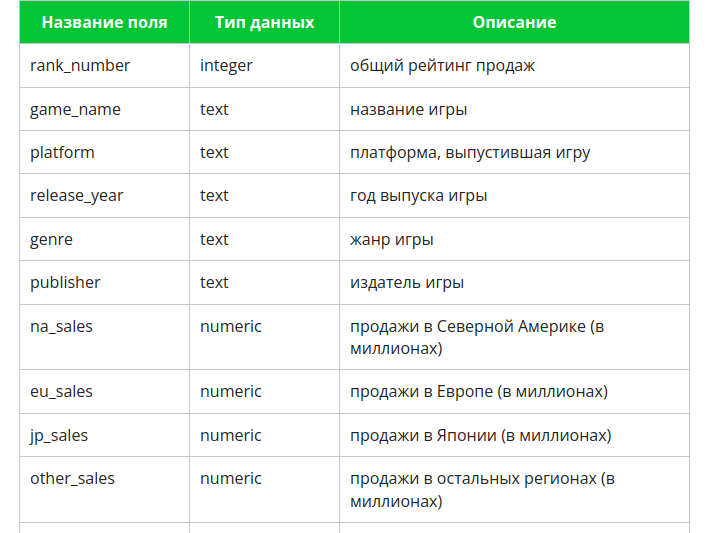

CASE — оператор, с помощью которого можно добавить условие и лучшим образом выстроить логику вычисления в запросах.
Оператор CASE по своей логике схож с функцией ЕСЛИ в Google Таблицах: он так же позволяет использовать то или иное значение в зависимости от записанного условия.

Синтаксис условного оператора CASE выглядит следующим образом:

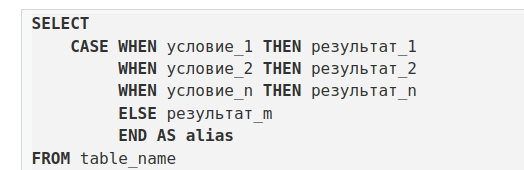

Использовать CASE можно во всех уже известных вам конструкциях: SELECT,  JOIN ON,  WHERE, GROUP BY, ORDER BY — а также внутри агрегатных функций.

Чтобы лучше понять возможности CASE, обратимся к нашему датасету.

При составлении таблицы sql.vgsales применялась жанровая классификация игр по Орланду, Стейнбергу и Томасу (кто все эти люди и что это за классификация, можно узнать тут).

А что, если мы хотим переорганизовать данные и применить к ним классификацию Кроуфорда, распределив игры по двум категориям — Skill-and-action и Strategy?

Для начала составим таблицу-справочник с распределением жанров по категориям, чтобы знать, в какие категории какие жанры игр переводить.

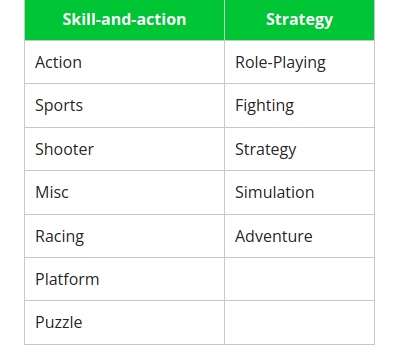

С помощью условного оператора CASE напишем запрос, который будет относить существующие жанры к одной из двух категорий, и посчитаем количество игр согласно новой классификации.



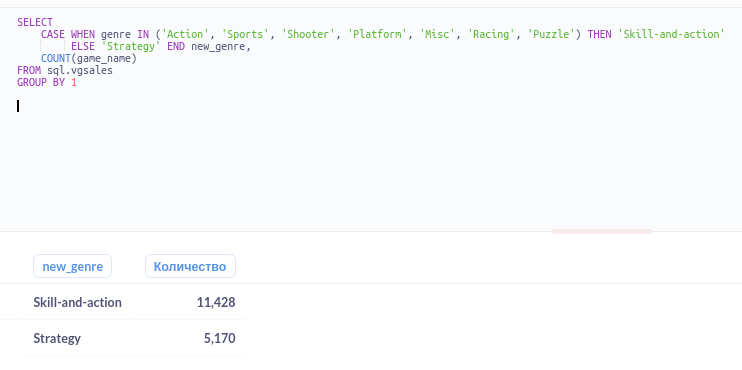

В результате запроса мы, как и планировали, вывели количество игр в соответствии с классификацией Кроуфорда.

Каждое условие в операторе CASE представляет собой выражение, возвращающее результат типа boolean, и логика выполнения запроса сводится к следующему:

→ если результат выражения — TRUE, значением CASE становится результат, следующий за условием, а остальная часть выражения CASE не вычисляется;
→ если результат выражения — FALSE, за ним таким же образом проверяются все последующие предложения WHEN;
→ если для всех условий WHEN результат — FALSE, значением CASE становится результат, записанный в предложении ELSE (если предложение ELSE отсутствует, результатом выражения будет NULL).

Представить эту логическую последовательность можно так.

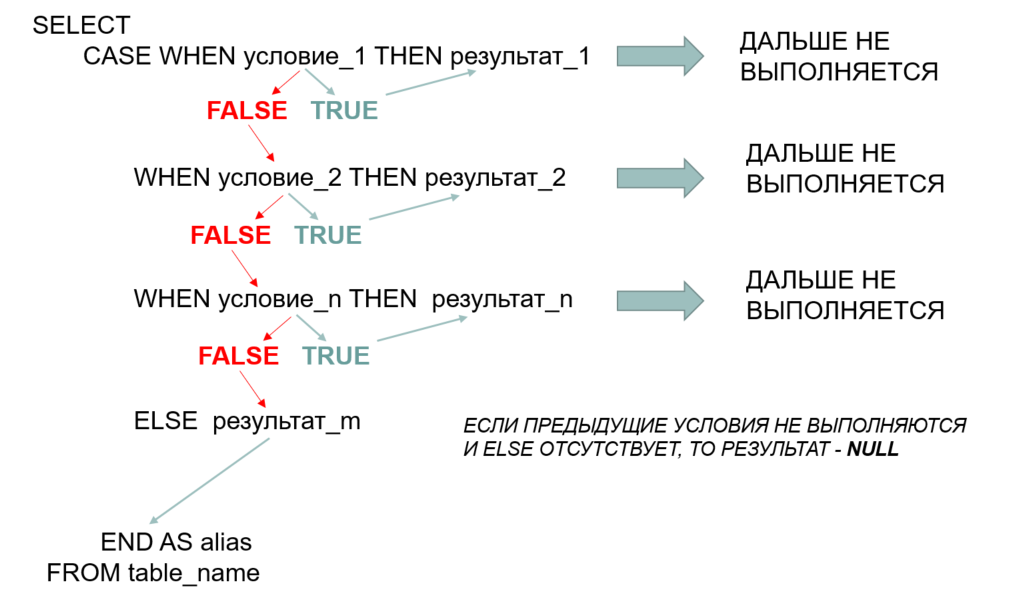

Написанный нами запрос по распределению игр можно визуализировать таким же образом.

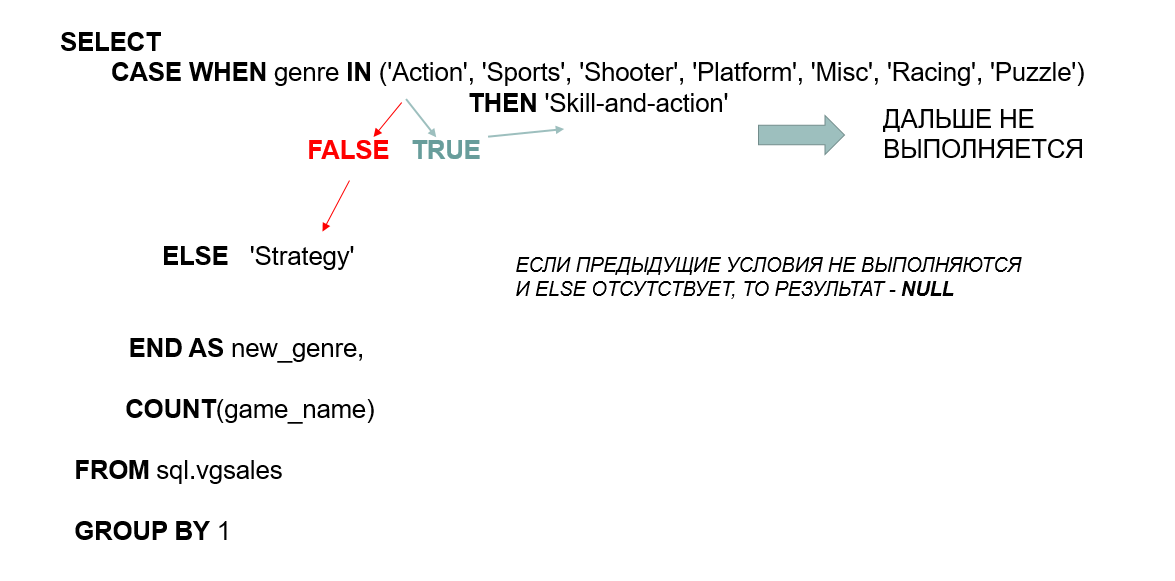

Что происходит на схеме?

Сначала проверяется условие — находится ли значение столбца genre в заданном списке (Action, Sports, Shooter, Platform, Misc, Racing, Puzzle). Если условие выполняется (TRUE), ставим значение Skill-and-action.

Если условие не выполняется (FALSE), переходим к следующему условию. Следующее условие в блоке — ELSE: выводим значение Strategy.

Не будь условия в блоке ELSE, выводилось бы значение NULL.

Итак, мы перечислили жанры, которые встречаются в категории Skill-and-action, а для тех, что не попали в обозначенный список, поставили условие, чтобы отнести их к new_genre.

Мы построили запрос так, потому что, предварительно изучив данные, убедились в том, что все жанры можно отнести либо к одной, либо к другой категории.

Но вообще для хорошего кода необходимо принимать в расчёт возможность существования нового жанра и учесть все случаи выполнения условий. Поэтому лучшей практикой будет следующий запрос:

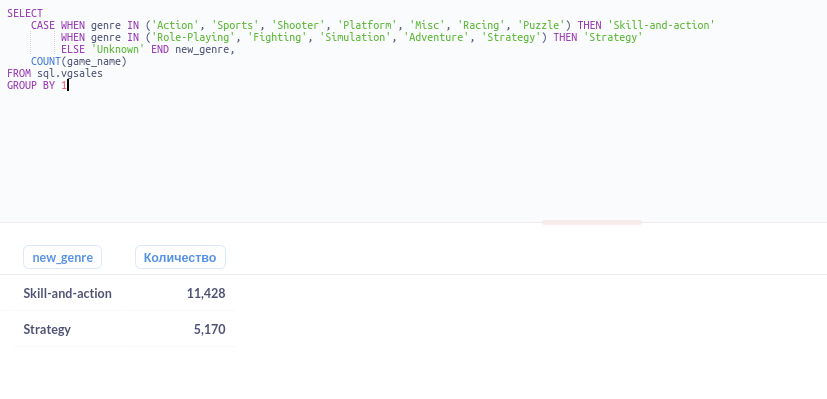

Вы случайно не храните тёплые воспоминания о приключениях Супер Марио? В нашей таблице, как видим, представлено несколько игр, в названиях которых упоминается дорогой сердечку герой. С помощью условного оператора CASE и оператора сравнения LIKE посчитаем количество игр с упоминанием Марио и без него. Если в названии игры содержится имя героя Mario, выводим 'Mario game', если не содержится — 'Not Mario game'. Колонки к выводу — games, counts. Отсортируйте в алфавитном порядке по первому столбцу.

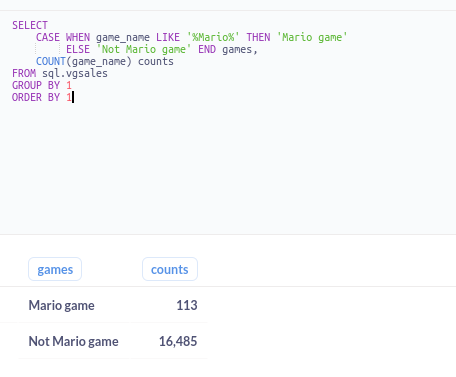

Если внимательно посмотреть на издательства, представленные в таблице, можно заметить, что существует несколько брендов, принадлежащих одной компании. Например, Sony Computer Entertainment, Sony Computer Entertainment Europe, Sony Online Entertainment, Sony Computer Entertainment America, Sony Music Entertainment могут быть отнесены к Sony Entertainment. Аналогичная ситуация и с издательствами Idea Factory и Idea Factory International, которые также могут быть отнесены к Idea Factory. Напишите запрос с помощью операторов CASE и LIKE, который для вышеприведённых случаев заменяет частные названия на общие (Sony Entertainment и Idea Factory), а остальные издательства возвращает в исходном виде. Во второй колонке выведите сумму всех продаж с учётом изменений. Колонки к выводу — publishers, sales. Отсортируйте по продажам в порядке убывания.

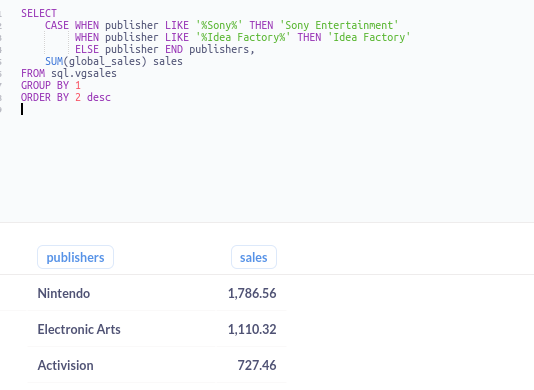

В прошлом юните мы вскользь упомянули, что оператор CASE может быть использован внутри различных конструкций, в том числе внутри агрегатных функций. Это позволяет сократить длину кода и оптимизировать выполнение запроса.

Вернёмся к нашему примеру с разделением жанров игр по категориям Skill-and-action и Strategy.

Предположим, нам нужно не просто разделить игры в соответствии с новой классификацией, но и рассчитать общие продажи. Составим следующий запрос.

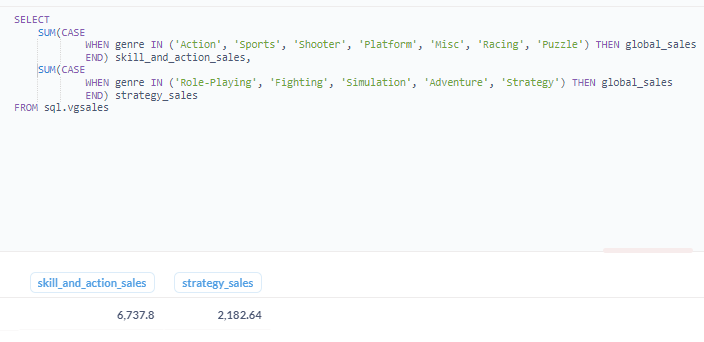

Так мы вывели две колонки: одну с названием skill_and_action_sales (в ней посчитали общие продажи по данной категории), а вторую с названием strategy_sales (в ней представлены продажи по соответствующей категории).

Обратите внимание! Суммируются только те значения global_sales, которые соответствуют требуемому условию в выводимом столбце.

С помощью условного оператора CASE и оператора сравнения LIKE напишите запрос, чтобы вывести в первой колонке общие продажи игр, в названии которых упоминается герой Марио, а во второй — в которых не упоминается. Колонки к выводу — mario_sales, not_mario_sales.

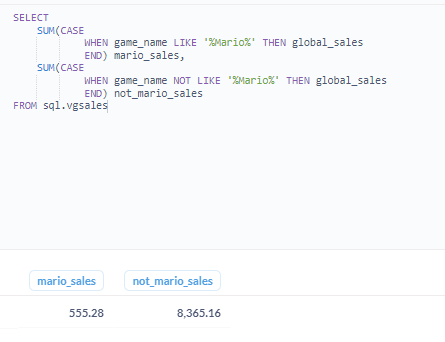

В тех случаях, когда нужно просмотреть значения какого-либо столбца и применить результат согласно определённому условию, можно воспользоваться краткой формой оператора CASE.

Например, когда в столбце даны идентификаторы пола как 'M' (от англ. male, мужчина) и  'F' (от англ. female, женщина), а вам нужно отобразить как 'Мужской' и 'Женский', что удобно сделать через краткий синтаксис CASE.

В общем виде краткий синтаксис оператора CASE выглядит следующим образом:

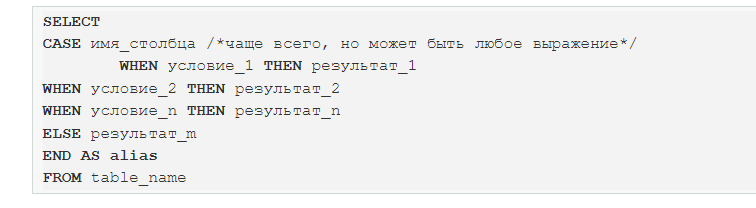

Отличие краткой конструкции CASE от полной состоит в том, что мы сначала выносим название столбца, а затем в блоках WHEN/ELSE применяем условия к нему.

Обратите внимание! Данная конструкция работает, только когда мы ищем конкретное значение в столбце (то есть при использовании оператора сравнения =).
Если же мы применяем другие условия (например, сравнение по диапазону >, <, LIKE), в ответ на введёный запрос получите сообщение об ошибке. По этой причине краткая конструкция менее распространена в использовании.

А теперь обратимся к нашему датасету и на его примере разберём, как с помощью краткого синтаксиса оператора можно оптимизировать запрос.

Для этого поставим задачу — просмотреть значения по столбцу genre и произвести такие изменения:

если в столбце genre — значение 'Sports', ставим 'Sport_game';

если в столбце genre — другое значение, то ставим 'Not_sport_game'.

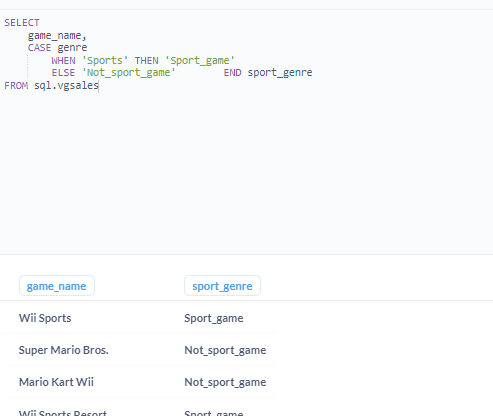

Получили, что и планировали: в первом столбце представлены названия игр, а во втором столбце — определяющий признак (принадлежность игры к спортивному или иному жанру).

В краткой конструкции можно проверить выполнение логического выражения, указав, что выводить, когда условие выполняется (TRUE), а что — когда не выполняется (FALSE).

То есть пример выше можно записать следующим образом:

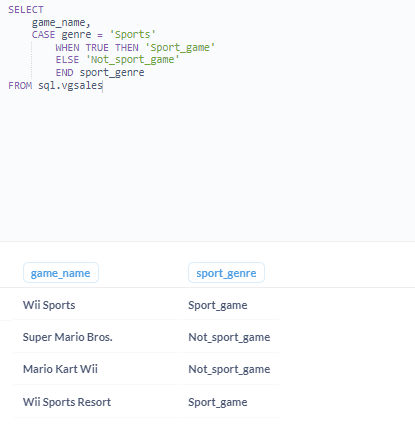

С помощью краткой конструкции напишите запрос, который для игр издательства Nintendo выводит ‘Nintendo_game’, а для других издательств — ‘Not_Nintendo_game’. Также во втором столбце выведите суммарные продажи согласно новым группам. Столбцы к выводу — game_group, group_sales.

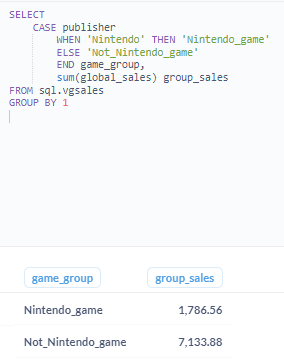

Когда нам приходится иметь дело со значением NULL, мы можем воспользоваться одним из операторов, которые предлагает PostgreSQL.

Предположим, в данных присутствуют столбцы с продажами по регионам. Некоторые из этих столбцов содержат нулевые значения, но при этом вам нужно произвести деление на них. Мы не можем делить на ноль, зато можем поделить на NULL: результатом деления будет также NULL.

Вот именно для таких (и им подобных) случаев полезно умение работать с оператором NULLIF.

Синтаксис выражения с NULLIF выглядит следующим образом:

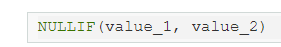

Это выражение значит, что в тех случаях, когда value_1=value_2, запрос вернёт значение NULL, в противном случае вернётся значение value_1.

Логику оператора NULLIF можно передать с помощью CASE.

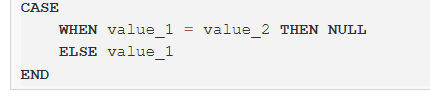

Но согласитесь, такая запись выглядит не так аккуратно.

Таким образом, NULLIF обладает как минимум двумя преимуществами:

⭐ делает запрос лаконичнее и удобнее для работы;

⭐ как и другие встроенные функции, работает быстрее.

На практике чаще всего NULLIF применяется для следующих целей:


ЕСЛИ ОТСУТСТВИЕ ЗНАЧЕНИЙ ЗАКОДИРОВАНО ОТЛИЧНЫМ ОТ NULL ОБРАЗОМ
Например, в колонке release_year для отсутствующих данных используется запись 'N/A' (представляет собой текст по типу данных). С помощью NULLIF мы можем для подобных значений вывести NULL:



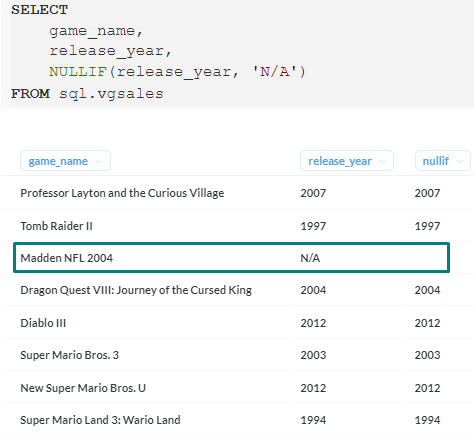

Посмотрим на результат запроса: для игры Madden NFL 2004 не задан год выпуска, вместо него в таблице стоит значение 'N/A'. С помощью оператора NULLIF мы вывели значение NULL для подобных записей.

ЕСЛИ НЕОБХОДИМО ПРОИЗВЕСТИ ДЕЛЕНИЕ НА 0

Например, мы хотим посмотреть во сколько раз продажи игр в Северной Америке превышают продажи в Европе. Мы знаем, что для некоторых игр продажи в Европе равны 0, поэтому без использования данного оператора запрос будет возвращать ошибку 'division by 0'.

Но мы теперь знаем, как этого не допустить.



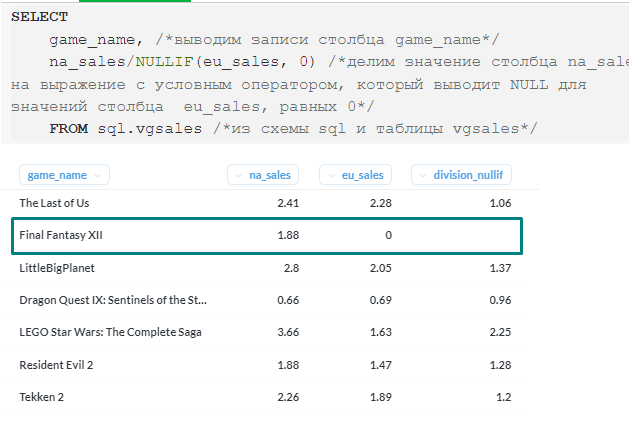

Выполнив запрос, видим, что в тех случаях, когда запись столбца eu_sales равна 0, деление с использованием NULLIF не выдаёт ошибку, а выводит значение NULL.

Напишите запрос, который выведет NULL для отсутствующих значений в столбце с издательствами (publisher=’N/A’). Колонки к выводу — game_name, publisher. Отсортируйте по названию игр в алфавитном порядке.

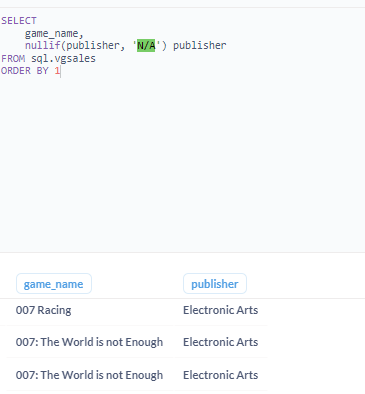

Напишите запрос, который выведет

названия игр (одно название игры на разных платформах считаем как разные игры!); статистику, во сколько раз продажи каждой из них в Северной Америке превышают продажи в Японии.
Колонки к выводу — game_name, na_jp_ratio. Отсортировать по названию игр в алфавитном порядке.

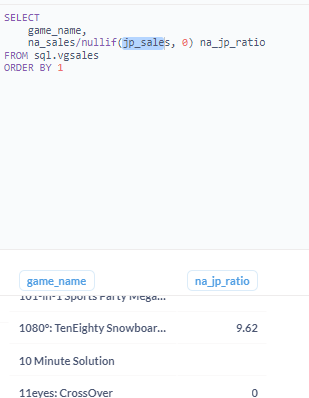

COALESCE — ещё один оператор для работы с NULL: он чаще всего используется для замены значений из списка, если какое-то из них равно NULL.

Например, мы собираем данные о стране пребывания пользователей из нескольких источников — ip-адреса, телефонного номера, физического адреса. Некоторые данные могут отсутствовать, тогда определяем страну по источникам, ранжированным по приоритету:

если заполнен физический адрес — определяем по нему,

если физического адреса нет, но есть телефон — определяем по телефону,

если нет ни физического адреса, ни телефона — определяем по ip-адресу (у этого источника низкий приоритет, поскольку он наименее надёжен: пользователи могут использовать VPN).

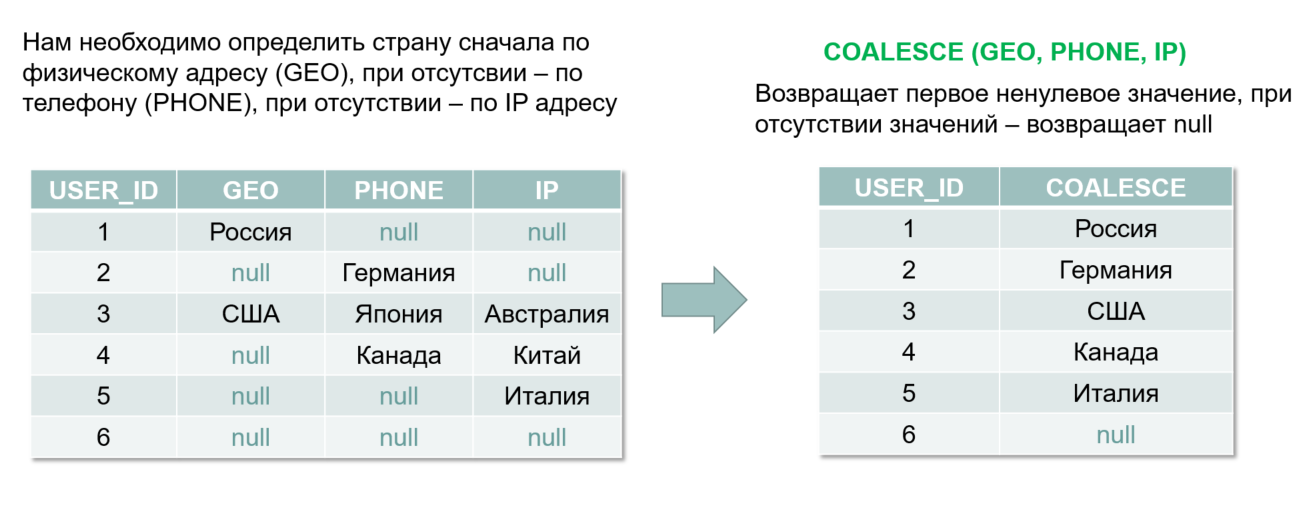

Синтаксис выражений с COALESCE выглядит так:

COALESCE(value_1, value_2, …, value_n)


Данная функция возвращает первое ненулевое значение из списка, указанного в скобках, начиная слева направо. Если все значения определены как NULL, функция вернёт NULL.

Как и в случае с NULLIF, принцип работы COALESCE можно описать с помощью оператора CASE.

CASE

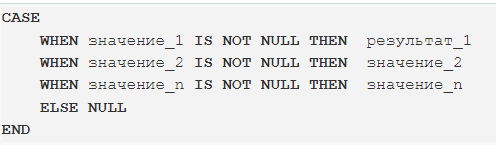

Впрочем, с точки зрения оптимальности такой код также оставляет желать лучшего. По этой причине желательно отдать предпочтение более ёмкому запросу с COALESCE.

Чтобы продемонстрировать принцип работы COALESCE, нам придётся обратиться к данным, с которыми мы работали в модуле «Сложные объединения», а именно — к таблице shipment с данными о доставках.

Допустим, нам нужно вывести город, а также вес доставки, если она осуществлялась в этот город. Если доставки не было, выводим 0.

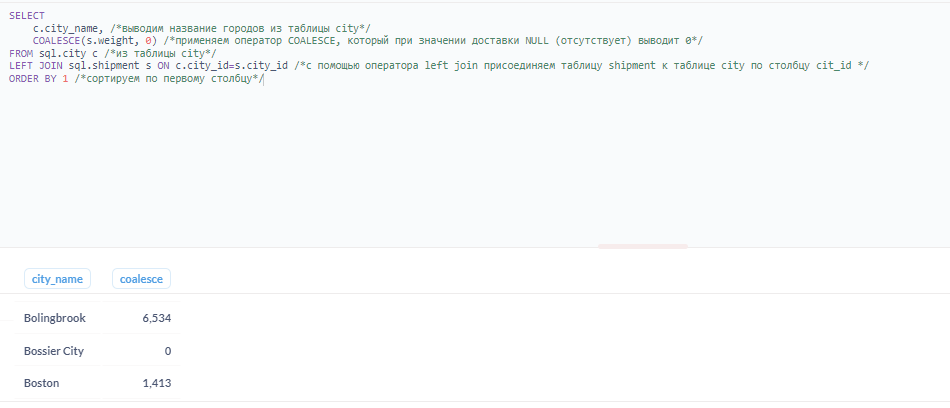

Благодаря этому запросу видим, что не во все города осуществлялись доставки: для таких городов выведено значение 0. Также в выводе у нас продублировались названия городов — это произошло по двум причинам:

В один и тот же населённый пункт осуществлялись доставки с разным весом.

Разные города в разных штатах имеют одно и то же название.

Обратите внимание! В выводимых колонках должен быть один тип данных.

На примере запроса выше вы убедились в верности этого утверждения: в ответ на COALESCE(s.weight, ‘доставка не осуществлялась’) вы получите сообщение об ошибке, поскольку нельзя числовые и текстовые данные вывести в одном столбце.

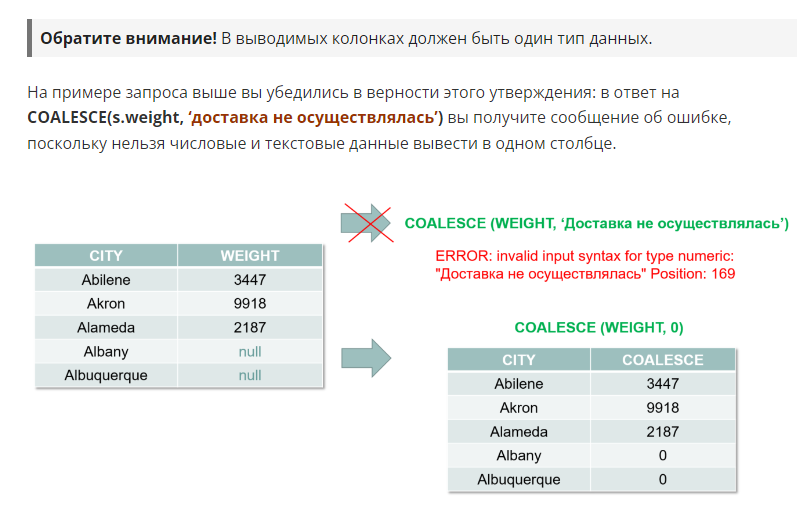

Напишите запрос, который выведет название города и имя клиента, если он там проживает, в противном случае — название города и фразу ‘нет клиента’. Столбцы к выводу — city_name, client. Отсортируйте по названию города в алфавитном порядке.

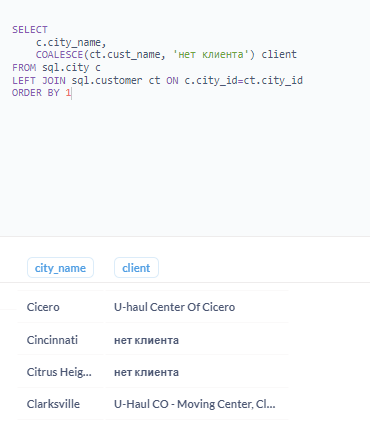

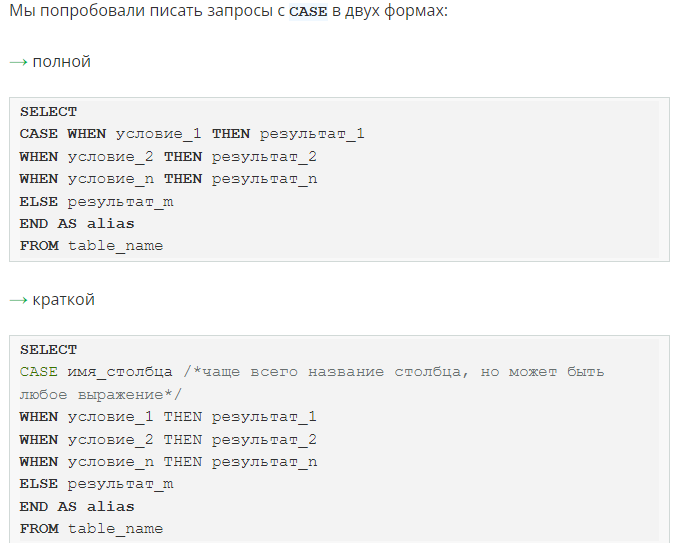

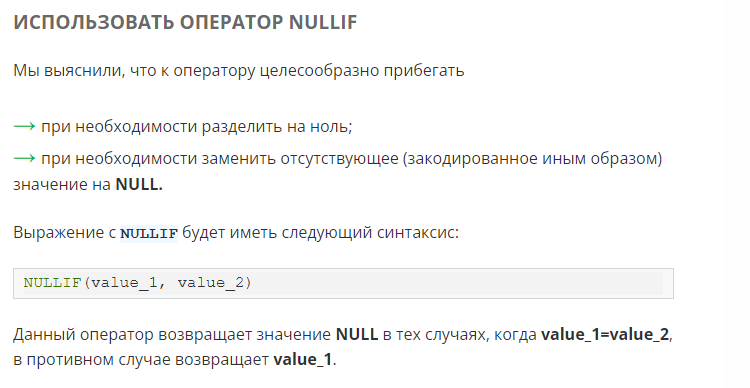

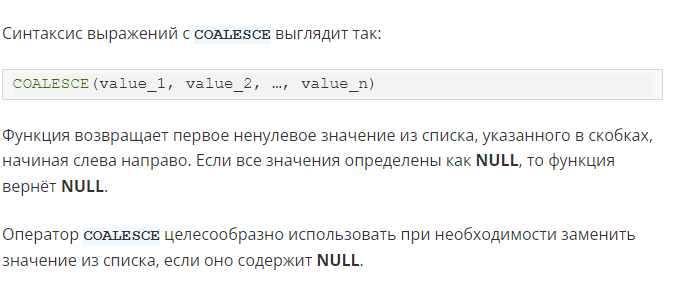

Используя таблицу sql.vgsales, выведите название игры, платформу и регион, в котором продажи были наиболее успешными:

'na_sales' — если продаж больше всего было в Северной Америке; 'eu_sales’ — если продаж больше всего было в Европе; 'jp_sales’ — если продаж больше всего в Японии; 'other_sales’ — если продаж больше всего в других регионах; 'several_regions’ — если максимальное значение продаж сразу в нескольких регионах.

Колонки к выводу — game_name, platform, biggest_sales_region. Отсортируйте по названию игры в алфавитном порядке.

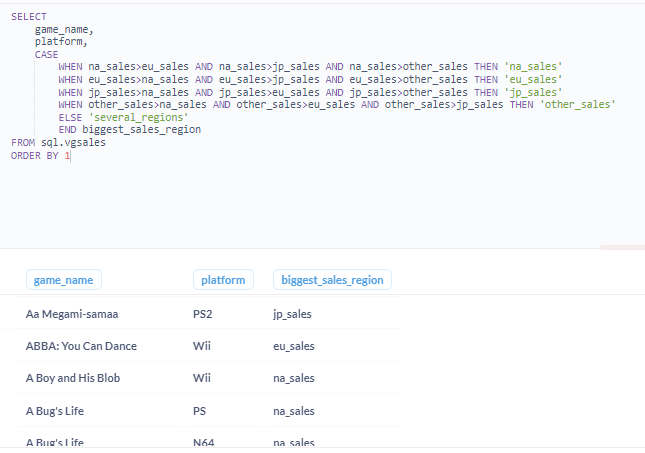

На основе таблиц sql.shipment и sql.city напишите код, который посчитает средний по штату вес доставляемого груза. Используя его как CTE, выведите:

название штата,
категорию доставок, где масса больше ('more'), меньше ('less'), равна ('equal') средней по штату массе посылок или не указана ('no_value'),
а также количество таких доставок.
Штаты без доставок выводить не нужно. Столбцы в выдаче — state (название штата), category (категория доставок; текстовый столбец, содержащий значения 'more', 'less', 'equal', 'no_value'), qty (количество доставок). Отсортируйте по первому и второму столбцам.

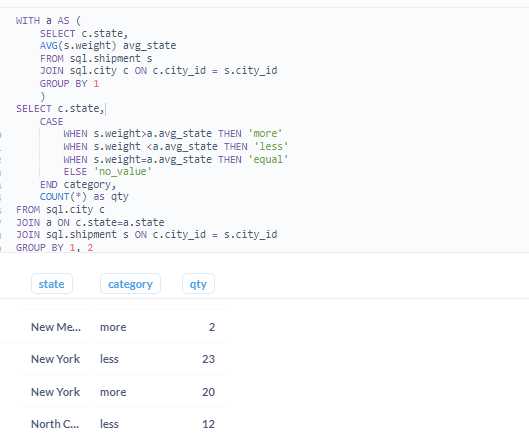

Используя таблицу sql.driver, напишите запрос, который выведет имена всех водителей и их телефоны. В случае если телефон не указан, заполните номером '(999) 999-9999'. Отсортируйте по имени водителя в алфавитном порядке.

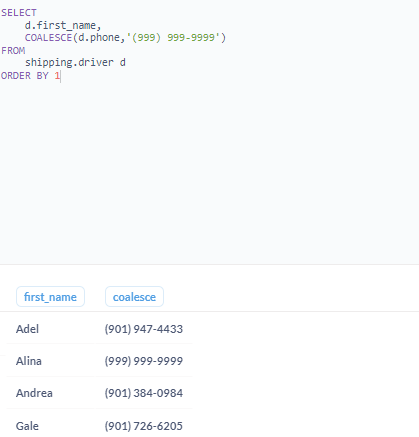